In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

sns.set()
plt.rcParams["figure.figsize"] = (8,8)

# Question 1

## Part A

There are 2 ways to find the FIM for this signal: use vector format or take the FIM for each individual sample $x[n]$ and sum the FIMs.

Here we will use the vector method.

We can consider the signal to be a vector $\mathbf{x}$, sampled from a normal distribution:

$$\mathbf{x} \sim N(\mu(\theta), \sigma^2 I_n)$$

Where the mean is defined to be:

$$\mu(\theta) = \mu(A, r) = A \ exp \Big (-r \begin{bmatrix} 0 \\ \dots \\ N-1 \\ \end{bmatrix} \Big )$$

We know that:

$$\big [J_\theta \big ]_{ij} = \Big ( \frac{\partial \mu_\theta}{\partial \theta_i} \Big )^T Q^{-1}_x \frac{\partial \mu_\theta}{\partial \theta_j}$$

So we need to calculate the following terms: $\frac{\partial \mu_\theta}{\partial A}$ and $\frac{\partial \mu_\theta}{\partial r}$



Through simple calculus we find:

$$\frac{\partial \mu_\theta}{\partial A} = exp \Big (-r \begin{bmatrix} 0 \\ \dots \\ N-1 \\ \end{bmatrix} \Big ) $$

and 

$$\frac{\partial \mu_\theta}{\partial A} = -A \begin{bmatrix} 0 \\ \dots \\ N-1 \\ \end{bmatrix} \ exp \Big (-r \begin{bmatrix} 0 \\ \dots \\ N-1 \\ \end{bmatrix} \Big )$$




Now simply plugging in each of the values we get:

$${J}_\theta = \frac{1}{\sigma^2} \begin{bmatrix} 
    \sum\limits_{n=0}^{N-1} e^{-2rn}       &  -A \sum\limits_{n=0}^{N-1} n e^{-2rn} \\
    \\
    -A \sum\limits_{n=0}^{N-1} n e^{-2rn}  &  A^2 \sum\limits_{n=0}^{N-1} n^2 e^{-2rn} \\
\end{bmatrix}$$

Note:  we simply use $\frac{1}{\sigma^2}$ due to the fact that we have $Q_x = \sigma^2 I$

In [67]:
# Generate the FIM for part A
def fisher1a(A, r, sigma, N):
    J = np.zeros((2,2))
    n = np.arange(0, N) # [0, 1,..., N-1]
    
    J[0,0] = np.sum(np.exp(-2 * r * n))
    J[0,1] = -A * np.sum(n * np.exp(-2 * r * n))
    J[1,0] = -A * np.sum(n * np.exp(-2 * r * n))
    J[1,1] = A**2 * np.sum(n**2 * np.exp(-2 * r * n))

    return J / (sigma**2)

## Part B

The variance for A will be the first row and first column of the inverted FIM $\Big [ J_\theta^{-1} \Big ]_{AA}$ 

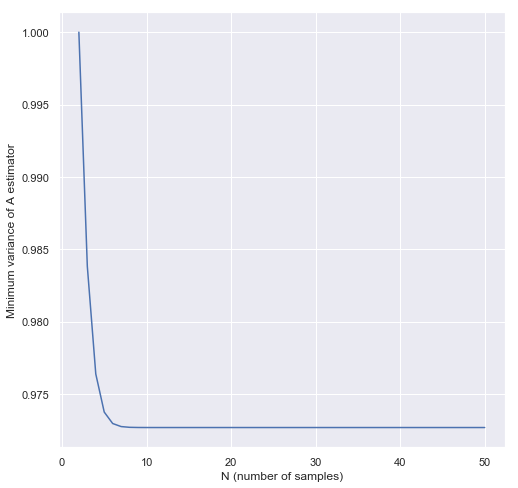

In [91]:
n = np.arange(2,51)
var_aa = [np.linalg.inv(fisher1a(A=0.8, r=.9, sigma=np.sqrt(1), N=N))[0,0] for N in range(2,51)]
plt.plot(n, var_aa)
plt.xlabel("N (number of samples)")
plt.ylabel("Minimum variance of A estimator")
plt.show()

## Part C

We know the fisher information for A (it is the same as before since the caclulations are all the same). The difference here is in B we inverted the (2x2) element FIM and then took the first element. Here we instead invert the (1x1) element FIM (simply the FI for A).

To show the difference:

Part B we did:
$$\Big [ J_\theta^{-1} \Big ]_{AA}$$

For part C we do:
$$\Big [ J_\theta \Big ]_{AA}^{-1}$$

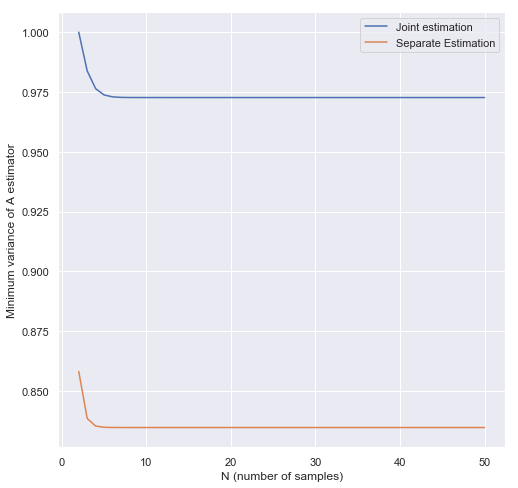

In [95]:
n = np.arange(2,51)
var_A_joint = [np.linalg.inv(fisher1a(A=0.8, r=.9, sigma=np.sqrt(1), N=N))[0,0] for N in range(2,51)]
var_A_separate = [1 / fisher1a(A=0.8, r=.9, sigma=np.sqrt(1), N=N)[0,0] for N in range(2,51)]
plt.plot(n, var_A_joint, n, var_A_separate)
plt.xlabel("N (number of samples)")
plt.ylabel("Minimum variance of A estimator")
plt.legend(["Joint estimation", "Separate Estimation"])
plt.show()

## Part D

There will be a certain point where the signal $x[n]$ will be dominated by the noise and there will no longer be possible to improve the estimate of A due to signal noise. Therefore it will be impossible to reduce the variance of the estimate of A.

## Part E

Sometimes the covar matrix or FIM is not an invertable matrix...

Whenever the determinant of the FIM is equal to 0 then you cannot jointly determine A and r (it will be impossible to invert the Fisher Information Matrix)

# Question 2

## Part A

Let us first define $\mathbf{x}$ as vectors of samples, and $\mathbf{s}$ as a vector of values from $s[n]$.

Since we are sampling noise from a normal distribution we can write the normal distribution has a mean of $\mu = A \mathbf{s}$, and variance of $\mathbf{Q}$
$$\mathbf{x} \sim N(A\mathbf{s}, \mathbf{Q})$$


To find the MLE we need to find the maximum of the PDF. A trick that simplifies math of exponentials is maximize the log of the pdf, this point will also be the maximum of the original pdf. To do this we set the derivative of the log pdf to zero.
We can write out the full form of the pdf as follows:
$$f_x(x | \theta) = \frac{1}{|2\pi Q|^{\frac{N}{2}}} exp \Big (-\frac{1}{2} (\mathbf{x} - A \mathbf{s})^T Q^{-1} (\mathbf{x} - A \mathbf{s}) \Big )$$

And the log pdf as:
$$ln \big (f_x(x | \theta) \big ) = ln \Big ( \frac{1}{|2\pi Q|^{\frac{N}{2}}} \Big ) -\frac{1}{2} (\mathbf{x} - A \mathbf{s})^T Q^{-1} (\mathbf{x} - A \mathbf{s})$$

With the derivative as:
$$\frac{\partial ln \big (f_x(x | \theta) \big )}{\partial A} = (\mathbf{x} - A \mathbf{s})^T Q^{-1} \mathbf{s}$$

Setting the derivative to 0 we get:
$$0 = (\mathbf{x} - A \mathbf{s})^T Q^{-1} \mathbf{s}$$
$$(A \mathbf{s})^T Q^{-1} \mathbf{s} = (\mathbf{x})^T Q^{-1} \mathbf{s}$$
$$A \mathbf{s} = \mathbf{x}$$
$$\hat A = \mathbf{x}^T \mathbf{s}^{-1}$$

So we find the the Maximum-Likelihood Estimator is $\hat A = \mathbf{x}^T \mathbf{s}^{-1} = \sum\limits_{n=1}^N \frac{x[n]}{s[n]}$

## Part B

The mean:

$$ E[\hat A] = E[\mathbf{x}^T \mathbf{s}^{-1}] = E[\mathbf{x}^T] \ \mathbf{s}^{-1} = (A \mathbf{s}) \ \mathbf{s}^{-1} = A$$


The variance:

$$J_\theta = \Big ( \frac{\partial \mu_\theta}{\partial \theta} \Big )^T Q^{-1}_x \frac{\partial \mu_\theta}{\partial \theta}$$

$$\frac{\partial \mu_\theta}{\partial \theta} = \frac{\partial (A \mathbf{s})}{\partial A} = \mathbf{s}$$

$$J_\theta = \mathbf{s}^T Q^{-1} \mathbf{s}$$

$$var[\hat A] = \frac{1}{J_\theta} = \big ( \mathbf{s}^T Q^{-1} \mathbf{s} \big )^{-1}$$


## Part C

Now let's setup the following equation to find the optimal estimator:

We want our equation to be in the form of:
$$V(\mathbf{x}) = J (T - \theta)$$

We found the score already back in part A
$$V(\mathbf{x} | \theta) = \nabla_\theta ln f_x(\mathbf{x} | \theta) = \frac{\partial ln \big (f_x(\mathbf{x} | \theta) \big )}{\partial A} = (\mathbf{x} - A \mathbf{s})^T Q^{-1} \mathbf{s}$$

And the fisher information is:
$$J_\theta = \Big ( \frac{\partial \mu_\theta}{\partial \theta} \Big )^T Q^{-1}_x \frac{\partial \mu_\theta}{\partial \theta}$$
$$\frac{\partial \mu_\theta}{\partial \theta} = \frac{\partial (A \mathbf{s})}{\partial A} = \mathbf{s}$$

$$J_\theta = \mathbf{s}^T Q^{-1} \mathbf{s}$$

And here we take

$$\theta = A$$

Now rearranging:
\begin{align}
V(\mathbf{x} | \theta) &= (\mathbf{x})^T Q^{-1} \mathbf{s} - A \big (\mathbf{s}^T Q^{-1} \mathbf{s} \big ) \\
                       &= \big (\mathbf{x}^T Q^{-1} \mathbf{s}\big ) - \theta \big (J_\theta \big ) \\
                       &= J_\theta \Big ( \big (\mathbf{x}^T Q^{-1} \mathbf{s}\big )  J_\theta^{-1} - \theta \Big ) \\
\end{align}

We can see that we find the optimal estimator $T$ as:

\begin{align}
T &= \big (\mathbf{x}^T Q^{-1} \mathbf{s}\big )  J_\theta^{-1} \\
 &= \big (\mathbf{x}^T Q^{-1} \mathbf{s}\big )  \big (\mathbf{s}^T Q^{-1} \mathbf{s} \big )^{-1} \\
 &= \mathbf{x}^T \mathbf{s}^{-1} \\
 &= \sum\limits_{n=1}^N \frac{x[n]}{s[n]}
\end{align}

Which is the same as the MLE we found in part A.

# Question 3

$\frac{\partial \mathbf{\mu}(\theta)}{\partial x} = \frac{\partial}{\partial x}  \Big( -40 -40log_{10}(\sqrt{4 + (b_x[i] - x)^2 + (b_y[i] - y)^2}) \Big ) = \frac{40(b_x[i] - x)}{ln(10) \big ( (b_x[i] - x)^2 + (b_y[i] - y)^2 + 4 \big )}$

$\frac{\partial \mathbf{\mu}(\theta)}{\partial y} = \frac{\partial}{\partial y} \Big ( -40 -40log_{10} (\sqrt{4 + (b_x[i] - x)^2 + (b_y[i] - y)^2} ) \Big ) = \frac{40(b_y[i] - y)}{ln(10) \big ( (b_x[i] - x)^2 + (b_y[i] - y)^2 + 4 \big )}$

In [3]:
# Return the FIM for the x, y position and for a list of beacons (each x,y coordinates)
def fisher(x, y, beacons):
    J = np.zeros((2,2))
    ss_inv = 1 / 4**2
    for bx, by in beacons:
        # Note: np.log is the natural log
        # Derivative w.r.t. x
        dx = 40 * (bx - x) / (np.log(10) * ((bx-x)**2 + (by-y)**2 + 4))
        dy = 40 * (by - y) / (np.log(10) * ((bx-x)**2 + (by-y)**2 + 4))

        J[0,0] += dx * ss_inv * dx # Jxx
        J[0,1] += dx * ss_inv * dy # Jxy
        J[1,0] += dy * ss_inv * dx # Jyx
        J[1,1] += dy * ss_inv * dy # Jyy

    return J

In [5]:
# Grid of x,y positions
xs = np.linspace(0, 10, 100)
ys = np.linspace(0, 10, 100)

In [6]:
x_shape = xs.shape
y_shape = ys.shape
fisher_shape = (2,2)

# Create a grid of FIMs that correspond to the FIM of each x,y point in the grid
fim_grid = np.zeros(x_shape + y_shape + fisher_shape)
fim_grid.shape # Check that shape of grid is correct, expect (100, 100, 2, 2)

(100, 100, 2, 2)

In [7]:
# For all 8 beacons
# X,Y coordinates of each beacon
beacons = [(0,0), (10,0), (0,10), (10,10), (5,0), (10,5), (5,10), (0,5)]

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        fim_grid[i, j, :, :] = fisher(x, y, beacons)
        
fim_grid[0, 0, :, :]

array([[0.92205785, 0.15866348],
       [0.15866348, 0.92205785]])

In [8]:
fim_grid_4 = np.zeros_like(fim_grid)
beacons_4 = [(0,0), (10,0), (0,10), (10,10)]

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        fim_grid_4[i, j, :, :] = fisher(x, y, beacons_4)
        
fim_grid_4[2, 0, :, :]

array([[0.27354785, 0.04268004],
       [0.04268004, 0.22139806]])

In [21]:
# For nicer plots
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.mpl_palette("Blues", 256))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.rcParams["figure.figsize"] = (14,5)

vmin = np.min(np.concatenate((fim_grid[:, :, :, :], fim_grid_4[:, :, :, :])))
vmax = np.max(np.concatenate((fim_grid[:, :, :, :], fim_grid_4[:, :, :, :])))
vmin, vmax

(-0.5801986462392978, 2.8616539135193912)

In [22]:
# Just for display purposes let's use range -1 to 3
vmin, vmax = -1, 3

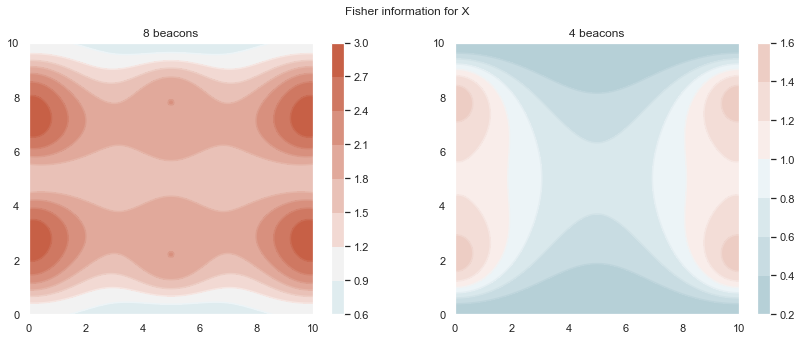

In [23]:
X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid[:, :, 0, 0], fim_grid_4[:, :, 0, 0]) # The x fisher information
labels = ("8 beacons", "4 beacons")

fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax) # Makes plot look smoother
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher information for X")
plt.show()

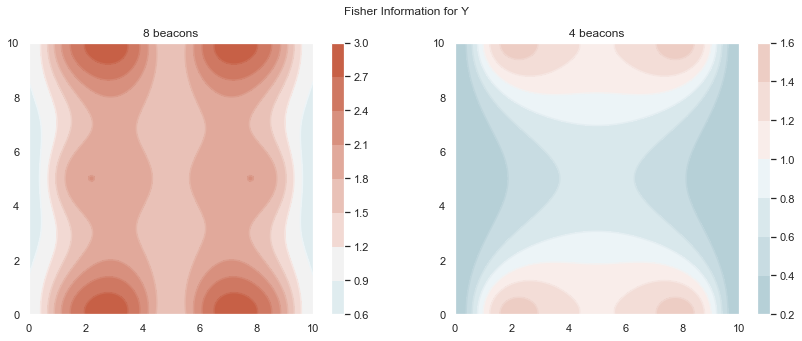

In [24]:
X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid[:, :, 1, 1], fim_grid_4[:, :, 1, 1]) # The y fisher information
labels = ("8 beacons", "4 beacons")

fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax) # Makes plot look smoother
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher Information for Y")
plt.show()

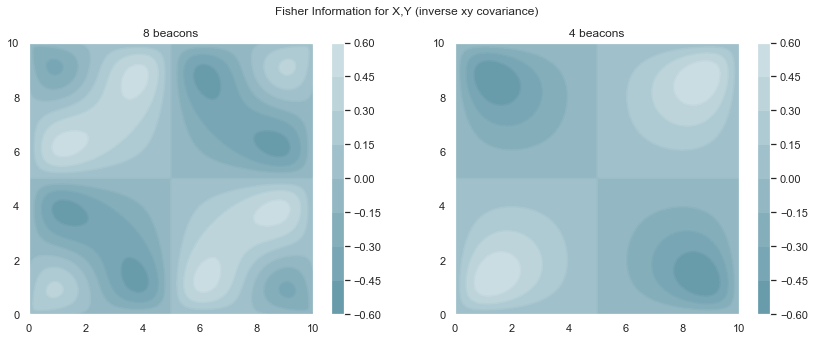

In [26]:
X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid[:, :, 0, 1], fim_grid_4[:, :, 0, 1]) # The xy fisher information
labels = ("8 beacons", "4 beacons")

fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax) # Makes plot look smoother
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher Information for X,Y (inverse xy covariance)")
plt.show()

### Try your own beacon locations
To enter custom beacon locations simply edit the `beacons_alt` with as many pairs of coordinates as you wish to see what the FI looks like in the room with different beacon locations

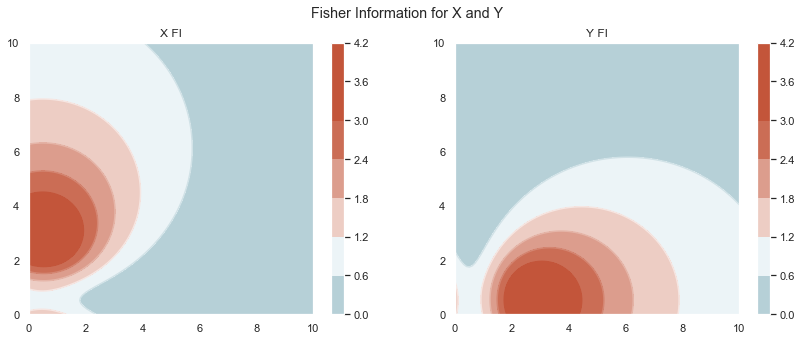

In [61]:
# Allows for trying your own set of beacons
beacons_alt = [(0,0), (1,1), (0,1), (1.1,0)]


xs = np.linspace(0, 10, 100)
ys = np.linspace(0, 10, 100)
x_shape = xs.shape
y_shape = ys.shape
fisher_shape = (2,2)
fim_grid_alt = np.zeros(x_shape + y_shape + fisher_shape)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        fim_grid_alt[i, j, :, :] = fisher(x, y, beacons_alt)

X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid_alt[:, :, 0, 0], fim_grid_alt[:, :, 1, 1])
labels = ("X FI", "Y FI")
fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher Information for X and Y")
plt.show()

### Interesting graph
This graph show how the closer to the beacon you get to the better the estimate (estimate drops off fairly quickly). The exception is at the closest point to the beacon, at this location the information drops to zero

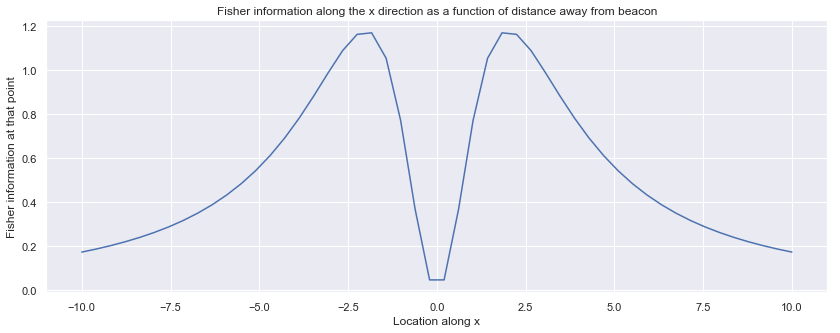

In [33]:
y = 0
x = np.linspace(-10, 10)
a, b = 0, 0
z = (40*(-x+a)) / (np.log(10) * ((-x+a)**2 + (b-y)**2 + 4))
plt.plot(x,z**2/16)
plt.xlabel("Location along x")
plt.ylabel("Fisher information at that point")
plt.title("Fisher information along the x direction as a function of distance away from beacon")
plt.show()